In [2]:
%cd ..

/Users/erwan/Programmes/2022 Datacamp/solar_wind


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from problem import get_train_data
from problem import turn_prediction_to_event_list

In [4]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)

In [5]:
def plot_event(start, end, data, delta=36, figsize=(10, 60)):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    label_subset = labels_train.loc[subset.index]

    n_data_cols = data.shape[1]

    fig, axes = plt.subplots(nrows=n_data_cols, ncols=1, figsize=figsize, sharex=True)
    
    if n_data_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, data.columns):

        l = 0.1
        low = np.ma.masked_where(label_subset > l, subset[col])
        high = np.ma.masked_where(label_subset < l, subset[col])
        
        ax.plot(subset.index, low)
        ax.plot(subset.index, high, color='orange')
        ax.set_ylabel(col)


    # add vertical lines
    for ax in axes:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")

    
    return fig, axes
    
def consecutive_plots(data, events, n_events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)
    random_index = rng.randint(0, len(events) - n_events)

    for i in range(random_index, random_index + n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

def multiple_plots(data, n_events, events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)

    for i in rng.randint(0, len(events), n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

In [6]:
df = data_train.copy()
df['label'] = labels_train

In [7]:
var = 'B'
small_df = df[[var, 'label']].copy()
storm_df = df[[var, 'label']][df['label'] == 1]
calm_df = df[[var, 'label']][df['label'] == 0]

In [8]:
small_df[var].describe()

count    509834.000000
mean          6.618241
std           6.590113
min           0.265439
25%           4.274620
50%           5.659535
75%           7.691845
max        1419.378296
Name: B, dtype: float64

In [9]:
calm_df[var].describe()

count    451269.000000
mean          6.267040
std           6.701846
min           0.265439
25%           4.136053
50%           5.428955
75%           7.214952
max        1419.378296
Name: B, dtype: float64

In [10]:
storm_df[var].describe()

count    58565.000000
mean         9.324401
std          4.869556
min          1.033130
25%          6.239811
50%          8.273197
75%         10.933852
max         56.476120
Name: B, dtype: float64

In [11]:
calm_df['B'][calm_df['B'] > 100].count()

145

label
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: B, dtype: object

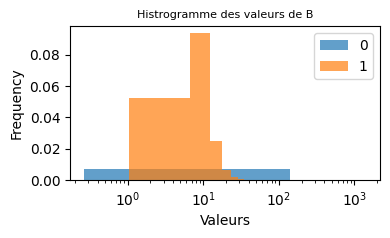

In [12]:
_, ax = plt.subplots(figsize=(4, 2))
ax.set_title('Histrogramme des valeurs de ' + var, fontsize=8)
plt.xlabel('Valeurs')

# small_df = small_df.drop(small_df[small_df[var] < 100].index)
small_df.groupby(['label'])[var].plot.hist(ax=ax, alpha=0.7, legend=True, density=True, logx=True)

In [16]:
pdyn_s = data_train['Pdyn'].copy()

In [22]:
n_iter = 10000
start = 0

frac_pdyn_s = pdyn_s.iloc[:n_iter]
frac_label = labels_train[:n_iter]

In [26]:
frac_pdyn_s[frac_pdyn_s > 0.3 * 1e-13] = 0.3 * 1e-13

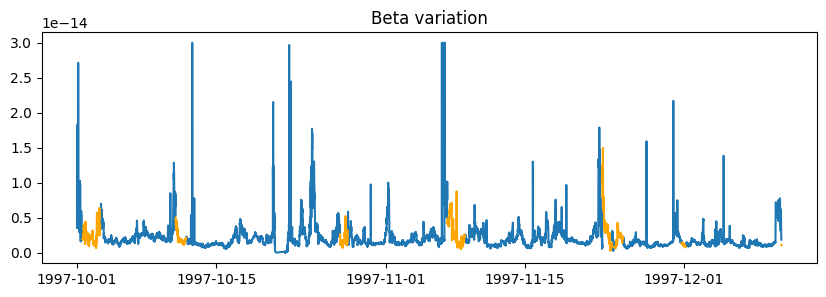

In [27]:
l = 0.1
low = np.ma.masked_where(frac_label, frac_pdyn_s)
high = np.ma.masked_where(frac_label < l, frac_pdyn_s)
# print('Max of the subset for ', col, subset[col].max())

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title('Beta variation')

ax.plot(frac_pdyn_s.index, low)
ax.plot(frac_pdyn_s.index, high, color='orange')
